<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RecSys/blob/main/AndreySusarev/%22Profpatolog_GB_NewDset_ipynb%2006/08%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Загрузка библиотек и инструментов

In [ ]:
# Установим библиотеки
print('Грузим библиотеки...')

import numpy as np
import pandas as pd
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, LSTM
# from tensorflow.keras.layers import Activation
# !pip install keras-tuner --upgrade
!pip install autokeras
import autokeras as ak
from tensorflow.keras import utils
# from keras_tuner.tuners import Hyperband, BayesianOptimization
# from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statistics
import re
# import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random
import os
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# from scipy import stats
from IPython.display import clear_output

%matplotlib inline

clear_output()
print('Загружено!')

Загружено!


In [ ]:
# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from keras.callbacks import ModelCheckpoint, EarlyStopping

## Загрузка и предобработка датасета

In [ ]:
# data = pd.read_excel('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%20%D0%BF%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3%20%D1%87%D0%B0%D1%81%D1%82%D1%8C.xlsx')

In [ ]:
# Подключим диск
from google.colab import drive
drive.mount('/content/drive')

# и сохраним туда исходную таблицу
# data.to_excel('/content/drive/MyDrive/Стажировка/Profpatolog/Data/data_2.xlsx')

Mounted at /content/drive


In [ ]:
# Загрузим таблицу для обработки
data = pd.read_excel('/content/drive/MyDrive/Стажировка/Profpatolog/Data/DS_Profpatolog_1980.xlsx')
data.head()

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,Оториноларингология3_Аудиометрия1_Значение,Оториноларингология3_Аудиометрия1_ЗначениеПредставление,Оториноларингология1_ЖалобыДополнение_Значение,Оториноларингология1_ЖалобыДополнение_ЗначениеПредставление,Стоматология2_ВП2_Значение,Стоматология2_ВП2_ЗначениеПредставление,Терапия2_ЗаключениеФОГК_Значение,Терапия2_ЗаключениеФОГК_ЗначениеПредставление,Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение,Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление
0,7f41ca7e-7dac-11ec-80fc-0cc47aab8067,c91e3407-b81f-11e9-80cf-0cc47aab8067,1976-10-24,Женский,Женский,2022-01-25,Периодический,Периодический,False,23c173a7-30d9-11e7-80d8-708bcd7f83cd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2ee1f9ac-83dd-11ec-80fc-0cc47aab8067,1a1a5fea-8b7f-11eb-80e8-0cc47aab8067,1987-11-18,Мужской,Мужской,2022-02-02,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9cbb191e-8e24-11ec-80fe-0cc47aab8067,7fe324e0-fa51-11eb-80f6-0cc47aab8067,1985-09-08,Мужской,Мужской,2022-02-15,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b8a33910-8eec-11ec-80fe-0cc47aab8067,98f9d761-8d65-11ec-80fe-0cc47aab8067,1988-04-25,Мужской,Мужской,2022-02-16,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0bb0d181-938c-11ec-80fe-0cc47aab8067,009aac7d-7bcf-11eb-80e8-0cc47aab8067,1984-04-17,Мужской,Мужской,2022-02-22,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Вычислим возраст клиентов, результат запишим в отдельную колонку
data['Возраст'] = (data['ДатаЗавершенияМедосмотра'] - data['КлиентДатаРождения']).dt.days // 365

In [ ]:
# Посмотрим...
# display(data.head())
data[['КлиентДатаРождения', 'ДатаЗавершенияМедосмотра', 'Возраст']].head()

,КлиентДатаРождения,ДатаЗавершенияМедосмотра,Возраст
0,1976-10-24,2022-01-25,45
1,1987-11-18,2022-02-02,34
2,1985-09-08,2022-02-15,36
3,1988-04-25,2022-02-16,33
4,1984-04-17,2022-02-22,37


In [ ]:
# Cоздаем список с искомыми словами в названиях столбцов для последующего удаления
excluded_words = ['Представление', 'Документ', 'Контрагент', 'Врач', 'ЗаключениеМК', 'Салон', 'Дата']

# Формируем новую таблицу, удаляя столбцы из созданного списка
new_columns = [col for col in data.columns if not any(word in col for word in excluded_words)]
new_df = data[new_columns]
new_df.info()

# Также удалим столбец "Клиент"
new_df=new_df.drop(columns=['Клиент'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Columns: 2256 entries, Клиент to Возраст
dtypes: bool(1), float64(772), int64(1), object(1482)
memory usage: 34.1+ MB


In [ ]:
df_cut = new_df.drop(new_df.select_dtypes(include=['bool']), axis=1)                                    # удаляем колонки с типом bool
df_cut df_cut.isnull().mean() < 0.8 = df_cut.loc[:, ]                                                   # удаляем "почти" пустые колонки
col_list = df_cut.columns.tolist()                                                                      # список столбцов
df_cut[col_list] = df_cut[col_list].astype(str).apply(lambda x: x.str.replace(r'\W+', '', regex=True))  # удаление служебных символов из столбцов
df_cut = df_cut.applymap(lambda x: x.lower() if type(x) == str else x)                                  # заменяем все заглавные буквы на прописные

In [ ]:
print(df_cut.info())
# df_cut.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Columns: 312 entries, КлиентПол to Возраст
dtypes: object(312)
memory usage: 4.7+ MB
None


In [ ]:
df_cut.describe()

,КлиентПол,ТипМедосмотра,Цех,Профессия,Заключение,ДиспансернаяГруппа,ВредныеФакторы,ЛабораторныеИсследования1_Специализация,ЛабораторныеИсследования1_ОАК_Значение,ЛабораторныеИсследования1_Биохимия_Значение,...,Гинекология1_Своды2_Значение,Гинекология1_НеИзмененоСОсобенностями_Значение,Гинекология1_CтепеньЧистоты_Значение,Гинекология1_АтипичныеКлетки_Значение,Гинекология1_PSPV_Значение,Терапия1_Курение_Значение,Стоматология1_НЛ6_Значение,ПсихиатрияНаркология1_ДиагнозДополнение_Значение,Терапия1_Диагноз_Значение,Возраст
count,1982,1982,1982,1982,1982,1982,1982,1982,1982,1982,...,1982,1982,1982,1982,1982,1982,1982,1982,1982,1982
unique,2,2,182,588,13,8,514,4,2,2,...,2,2,3,4,3,3,9,61,18,54
top,мужской,периодический,nan,водитель,годенкработевуказанныхусловиях,i,23,e866ea50093d11e287b2002618dcef2c,получен,получен,...,nan,nan,nan,nan,nan,00,nan,nan,z000общиймедицинскийосмотр_x000d_,36
freq,1451,1981,1180,64,1424,779,227,1652,1652,1655,...,1519,1519,1519,1519,1519,1105,1573,1468,856,83


In [ ]:
# Создадим словарь категориальных признаков "new_df"
dicts = {}
for i in df_cut.columns.values.tolist():
    if df_cut[i].dtypes == object:
        c = 0
        dl = {}
        for j in df_cut[i].unique():
            c += 1
            dl.update({j:c})
        dicts.update({i:dl})
# dict

In [ ]:
# Соберем таблицу категориальных признаков на базе "df_cut" и "dicts"
df_fl = df_cut.copy()
for i in dicts.keys():
    for j in range(df_cut[i].shape[0]):
        df_fl[i][j] = float(dicts.get(i).get(df_cut[i][j]))

In [ ]:
# Преобразуем в тип float
df_fl = df_fl.astype(float)
# df_fl

In [ ]:
df_fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Columns: 312 entries, КлиентПол to Возраст
dtypes: float64(312)
memory usage: 4.7 MB


In [ ]:
# Нормализуем данные в таблице признаков (кроме "Заключение")
for i in df_fl.columns.values.tolist():
   if i != 'Заключение':
        df_fl[i] = df_fl[i]/df_fl[i].max()

In [ ]:
# Сформируем массив данных и их значений
x=df_fl.drop(columns=['Заключение']).reset_index(drop=True)
y=df_fl['Заключение']
# x, y

In [ ]:
# Пример обработанных данных
# y = np.expand_dims(y, axis=1)
print(x.shape)
print(y.shape)

(1982, 311)
(1982,)


In [ ]:
# Разобъем массив на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)

In [ ]:
# Вывод размеров обучающей и проверочной выборок
print(f'Структура и размер массива обучающей выборки: {x_train.shape}')
print(f'Структура и размер массива проверочной выборки: {x_test.shape}')

Структура и размер массива обучающей выборки: (1585, 311)
Структура и размер массива проверочной выборки: (397, 311)


## Предобученные алгоритмы ML

In [ ]:
# Сначала загрузим библиотеки с алгоритмами ML и функциями ошибки
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
# Ранее при экспериментах выяснилось, что наибольшую точность на данном датасете
# из предобученных алгоритмов ML показывает GradientBoostingRegressor
# Поищем его наилучшую конфигурацию.

# Для этого импортируем класс GridSearchCV из модуля sklearn.model_selection.
# GridSearchCV - это инструмент для подбора оптимальных гиперпараметров модели при помощи
# перебора всех возможных комбинаций заданных значений.

from sklearn.model_selection import GridSearchCV

# Определяем параметры для перебора
param_grid = {'loss': ['ls', 'lad', 'huber', 'quantile'],
    'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1.0]}

# Создаем экземпляр GradientBoostingRegressor
gb = GradientBoostingRegressor()

# Инициализация класса GridSearchCV
grid_search = GridSearchCV(gb, param_grid=param_grid, cv=5, n_jobs=-1)

# Применяем GridSearchCV к данным для обучения
grid_search.fit(x, y)

# Выводим наилучшие параметры
print('Best parameters:', grid_search.best_params_)

Best parameters: {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 3, 'n_estimators': 50}


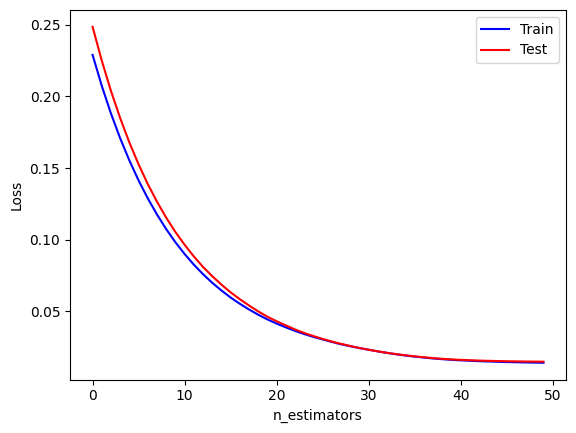

Точность на тестовых данных: 0.9719


In [ ]:
# Создание и обучение экземпляра GradientBoostingRegressor с "наилучшими" параметрами
# на обучающей выборке и проверка его работы на тестовой

params = {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 3, 'n_estimators': 50}

model = GradientBoostingRegressor(**params)
model.fit(x_train, y_train)

# отображение хода обучения
train_scores = []
test_scores = []

for i, y_pred in enumerate(model.staged_predict(x_train)):
    train_scores.append(model.loss_(y_train, y_pred))
for i, y_pred in enumerate(model.staged_predict(x_test)):
    test_scores.append(model.loss_(y_test, y_pred))

plt.plot(train_scores, 'b', label='Train')
plt.plot(test_scores, 'r', label='Test')
plt.legend(loc='upper right')
plt.xlabel('n_estimators')
plt.ylabel('Loss')
plt.show()

# проверка на тестовой выборке
test_score = model.score(x_test, y_test)
print("Точность на тестовых данных: {:.4f}".format(test_score))

Выводы:
1. Ввиду, по-сути, ничтожного количества значений класса "не годен" в исходном датасете алгоритмы машинного обучения показывают очень высокие результаты, что объясняется, на мой взгляд, попаданием отрицательных результатов диагностики ("не годен") в зону погрешности работы сети. Т.е. сеть выдает единственный результат, "годен".
2. Для повышения качества работы сети на сильно разбалансированных датасетах существует достаточно большое количество методов, при этом наилучший результат, как правило, дает их комбинация.

## Новый датасет (от 03.07.2023). Загрузка и предобработка данных.

In [ ]:
# Грузим датасет в переменную
data = pd.read_csv('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/%D0%92%D0%B5%D1%81%D1%8C%20%D0%BF%D0%B5%D1%80%D0%B8%D0%BE%D0%B4.csv',sep = ';')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Columns: 289 entries, ДокументПрохождениеМедосмотра to Эндоскопия1_МКБ102
dtypes: bool(1), float64(75), object(213)
memory usage: 71.9+ MB


In [ ]:
data.head(2)

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,ХирургНеИсп3_Диагноз_ЗначениеПредставлениеПредставление,ХирургНеИсп3_МКБ101,ХирургНеИсп3_МКБ102,ХирургНеИсп3_МКБ103,ЭКГНеИсп1_МКБ101,ЭКГНеИсп1_МКБ102,ЭКГНеИсп2_МКБ101,ЭКГНеИсп2_МКБ102,Эндоскопия1_МКБ101,Эндоскопия1_МКБ102
0,79292387-652a-11eb-80e7-0cc47aab8067,dca98d4e-2098-11ea-80d6-0cc47aab8067,1989-12-31T00:00:00,Женский,Женский,2021-02-02T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,78efe744-9c36-11eb-80eb-0cc47aab8067,b35fb2bb-9c35-11eb-80eb-0cc47aab8067,1998-07-20T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Преобразование отдельных столбцов в формат даты и времени:

date_columns = data.filter(like='Дата').columns
data[date_columns] = data[date_columns].apply(pd.to_datetime, errors='coerce')
data = data.dropna(subset=date_columns)

# data['КлиентДатаРождения'] = pd.to_datetime(data['КлиентДатаРождения'])
# data['ДатаЗавершенияМедосмотра'] = pd.to_datetime(data['ДатаЗавершенияМедосмотра'])

In [ ]:
# Вычислим возраст клиентов, результат запишим в отдельную колонку
data['Возраст'] = (data['ДатаЗавершенияМедосмотра'] - data['КлиентДатаРождения']).dt.days // 365

In [ ]:
data[['КлиентДатаРождения', 'ДатаЗавершенияМедосмотра', 'Возраст']].head()

,КлиентДатаРождения,ДатаЗавершенияМедосмотра,Возраст
0,1989-12-31,2021-02-02,31
1,1998-07-20,2021-04-13,22
2,2002-01-04,2021-04-13,19
3,1991-08-26,2021-04-13,29
4,1999-03-21,2021-07-29,22


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32441 entries, 0 to 32685
Columns: 290 entries, ДокументПрохождениеМедосмотра to Возраст
dtypes: bool(1), datetime64[ns](2), float64(75), int64(1), object(211)
memory usage: 71.8+ MB


In [ ]:
# Cоздаем список с искомыми словами в названиях столбцов для последующего удаления
excluded_words = ['Представление', 'Документ', 'Контрагент', 'Врач', 'ЗаключениеМК', 'Салон', 'Дата']

# Формируем новую таблицу, удаляя столбцы из созданного списка
new_columns = [col for col in data.columns if not any(word in col for word in excluded_words)]
new_df = data[new_columns]
new_df.info()

# Также удалим столбец "Клиент"
new_df=new_df.drop(columns=['Клиент'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32441 entries, 0 to 32685
Columns: 219 entries, Клиент to Возраст
dtypes: bool(1), float64(20), int64(1), object(197)
memory usage: 54.2+ MB


In [ ]:
# Подключим Гугл-диск
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# и сохраним туда обработанную таблицу
data.to_csv('/content/drive/MyDrive/Стажировка/Profpatolog/Data/data_030723.csv')

In [ ]:
df_cut = new_df.drop(new_df.select_dtypes(include=['bool']), axis=1)                                    # удаляем колонки с типом bool
df_cut = df_cut.loc[:, df_cut.isnull().mean() < 0.8]                                                    # удаляем "почти" пустые колонки
col_list = df_cut.columns.tolist()                                                                      # список столбцов
df_cut[col_list] = df_cut[col_list].astype(str).apply(lambda x: x.str.replace(r'\W+', '', regex=True))  # удаление служебных символов из столбцов
df_cut = df_cut.applymap(lambda x: x.lower() if type(x) == str else x)                                  # заменяем все заглавные буквы на прописные

In [ ]:
df_cut.nunique()

КлиентПол                              4
ТипМедосмотра                          2
Цех                                  716
Профессия                           2704
Заключение                            29
ВредныеФакторы                      2518
Дерматовенерология1_МКБ101            26
ЛабораторныеИсследования1_МКБ101       3
Неврология1_МКБ101                    48
Оториноларингология1_МКБ101           46
Офтальмология1_МКБ101                 75
ПсихиатрияНаркология1_МКБ101          27
Стоматология1_МКБ101                  14
Терапия1_МКБ101                      125
Хирургия1_МКБ101                      19
Возраст                               71
dtype: int64

In [ ]:
# Посмотрим значения столбцов "КлиентПол" и "Заключение":
unique_values = df_cut['КлиентПол'].unique()
print(unique_values)

unique_values = df_cut['Заключение'].unique()
print(unique_values)

['женский' 'мужской' 'nan' 'неуказан']
['годенкработевуказанныхусловиях'
 'годенкработевуказанныхусловияхскоррекциейзрения'
 'годенкработевуказанныхусловияхскоррекциейзрениякромеп17'
 'нуждаетсявдообследованииилечении' 'nan'
 'годенкработевуказанныхусловияхскоррекциейзрениякромеп61'
 'годенкработевуказанныхусловияхбезработнавысотах'
 'годенкработевуказанныхусловияхскоррекциейзрениякромеп61п8'
 'годенкработевуказанныхусловияхкромеп17'
 'годенкработевуказанныхусловияхскоррекциейзрениякромеп61п14ип17'
 'годенкработевуказанныхусловияхкромеп14ип17'
 'годенкработевуказанныхусловияхкромеп44'
 'годенкработевуказанныхусловияхкромеп62п181'
 'годенкработевуказанныхусловияхскоррекциейзрениябезработнавысотах'
 'годенкработевуказанныхусловияхскоррекциейзрениякромеп61э'
 'годенкработевуказанныхусловияхскоррекциейслуха'
 'годенкработевуказанныхусловияхскоррекциейзрениякромеп6162'
 'годенкработевуказанныхусловияхскоррекциейзрениякромеп62'
 'годенкработевуказанныхусловияхпротивопаказанаработасподьемомип

In [ ]:
# Подчистим таблицу

# удаляем строки со значением "nan", "неуказан", из стробца "КлиентПол":
# df_cut = df_cut.drop(df_cut[df_cut['КлиентПол'] == 'nan'].index)
# df_cut = df_cut.drop(df_cut[df_cut['КлиентПол'] == 'неуказан'].index)

# удаляем строки со значением "стропальщик", "п181", "nan" из стробца "Заключение":
df_cut = df_cut.drop(df_cut[df_cut['Заключение'] == 'стропальщик'].index)
df_cut = df_cut.drop(df_cut[df_cut['Заключение'] == 'п181'].index)
df_cut = df_cut.drop(df_cut[df_cut['Заключение'] == 'nan'].index)


In [ ]:
# Посмотрим варианты значений столбца "Заключение" и их количество
df_cut['Заключение'].value_counts()

годенкработевуказанныхусловиях                                                                                                                                                                     17400
годенкработевуказанныхусловияхскоррекциейзрения                                                                                                                                                     1025
годенкработевуказанныхусловияхскоррекциейзрениякромеп61                                                                                                                                               64
годенкработевуказанныхусловияхбезработнавысотах                                                                                                                                                       45
нуждаетсявдообследованииилечении                                                                                                                                                                    

In [ ]:
# Оставим три класса годности:
df_cut['Заключение'] = df_cut['Заключение'].replace(['годенкработевуказанныхусловиях'], 'годен')
df_cut['Заключение'] = df_cut['Заключение'].replace(['нуждаетсявдообследованииилечении', 'nan', 'негоден'], 'негоден')
df_cut['Заключение'] = df_cut['Заключение'].map(lambda x: x if x in ['годен', 'негоден'] else 'органиченно годен')

In [ ]:
unique_values = df_cut['Заключение'].unique()
print(unique_values)
df_cut['Заключение'].value_counts()

['годен' 'органиченно годен' 'негоден']


годен                17400
органиченно годен     1182
негоден                 43
Name: Заключение, dtype: int64

In [ ]:
# Уберем половину "годных"
count = 0
df_cut_1 = df_cut
# Проходим по каждой строке датафрейма
for index, row in df_cut_1.iterrows():
    if row['Заключение'] == 'годен':
        # Увеличиваем счетчик на 1, когда встречаем строку с "Годен"
        count += 1
        if count % 2 == 0:
            # Удаляем каждую вторую строку, где значение в колонке "Заключение" равно "Годен"
            df_cut_1.drop(index, inplace=True)


In [ ]:
df_cut_1['Заключение'].value_counts()

годен                8700
органиченно годен    1182
негоден                43
Name: Заключение, dtype: int64

In [ ]:
df_cut_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9925 entries, 0 to 9924
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   КлиентПол                         9925 non-null   object
 1   ТипМедосмотра                     9925 non-null   object
 2   Цех                               9925 non-null   object
 3   Профессия                         9925 non-null   object
 4   Заключение                        9925 non-null   object
 5   ВредныеФакторы                    9925 non-null   object
 6   Дерматовенерология1_МКБ101        9925 non-null   object
 7   ЛабораторныеИсследования1_МКБ101  9925 non-null   object
 8   Неврология1_МКБ101                9925 non-null   object
 9   Оториноларингология1_МКБ101       9925 non-null   object
 10  Офтальмология1_МКБ101             9925 non-null   object
 11  ПсихиатрияНаркология1_МКБ101      9925 non-null   object
 12  Стоматология1_МКБ101

In [ ]:
# Обновим индексы строк таблицы:
df_cut_1 = df_cut.reset_index(drop=True)

In [ ]:
# Создадим словарь категориальных признаков "new_df"
dicts = {}
for i in df_cut_1.columns.values.tolist():
    if df_cut_1[i].dtypes == object:
        c = 0
        dl = {}
        for j in df_cut_1[i].unique():
            c += 1
            dl.update({j:c})
        dicts.update({i:dl})

In [ ]:
print(df_cut_1.shape)

(9925, 16)


In [ ]:
# Соберем таблицу категориальных признаков на базе "df_cut" и "dicts"
df_fl = df_cut_1.copy()
for i in dicts.keys():
    for j in range(df_cut_1[i].shape[0]):
        df_fl[i][j] = float(dicts.get(i).get(df_cut_1[i][j]))

In [ ]:
df_fl.iloc[4750]

КлиентПол                             2.0
ТипМедосмотра                         1.0
Цех                                   1.0
Профессия                           783.0
Заключение                            1.0
ВредныеФакторы                      370.0
Дерматовенерология1_МКБ101            2.0
ЛабораторныеИсследования1_МКБ101      1.0
Неврология1_МКБ101                    1.0
Оториноларингология1_МКБ101           2.0
Офтальмология1_МКБ101                 1.0
ПсихиатрияНаркология1_МКБ101          1.0
Стоматология1_МКБ101                  2.0
Терапия1_МКБ101                       1.0
Хирургия1_МКБ101                      1.0
Возраст                              27.0
Name: 4750, dtype: object

In [ ]:
y_ohe[4750]

array([0., 0., 0., 1.], dtype=float32)

In [ ]:
# Преобразуем в тип float
df_fl = df_fl.astype(float)

In [ ]:
# Нормализуем данные в таблице признаков (кроме "Заключение")
for i in df_fl.columns.values.tolist():
   if i != 'Заключение':
        df_fl[i] = df_fl[i]/df_fl[i].max()

In [ ]:
# Сформируем массив данных и их значений
x=df_fl.drop(columns=['Заключение']).reset_index(drop=True)
y=df_fl['Заключение'].reset_index(drop=True)
# x, y

In [ ]:
y.unique()


array([1., 2., 3.])

In [ ]:
# Посмотрим размерности
print(x.shape)
print(y.shape)

(9925, 15)
(9925,)


In [ ]:
# Получим список номеров строк (индексов) с соответсвующими классами
index_0 = df_fl.loc[df_fl['Заключение'] == 1.].index.tolist()
index_1 = df_fl.loc[df_fl['Заключение'] == 2.].index.tolist()
index_2 = df_fl.loc[df_fl['Заключение'] == 3.].index.tolist()

In [ ]:
print(index_0)
print(index_1)
print(index_2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 159, 160, 161, 163, 164, 165, 166, 167, 168, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 213, 215, 216, 217, 218, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 

In [ ]:
# Преобразуем массив значений в формат OHE

y_ohe = utils.to_categorical(y)

In [ ]:
print(y_ohe)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [ ]:
# Разобъем массив на обучающую и тестовую выборки
# Для МL моделей
# x_train_ML, x_test_ML, y_train_ML, y_test_ML = train_test_split(x, y, test_size = 0.2, shuffle = False)

# Для DL моделей
x_train_DL, x_test_DL, y_train_DL, y_test_DL = train_test_split(x, y_ohe, test_size = 0.2, shuffle = False)

In [ ]:
# Вывод размеров обучающей и проверочной выборок
# print(f'Структура и размер массива обучающей выборки ML: {x_train_ML.shape}')
# print(f'Структура и размер массива проверочной выборки ML: {x_test_ML.shape}')
# print(f'Структура и размер массива результатов обучающей выборки ML: {y_train_ML.shape}')
# print(f'Структура и размер массива результатов проверочной выборки ML: {y_test_ML.shape}')
print(f'Структура и размер массива обучающей выборки DL: {x_train_DL.shape}')
print(f'Структура и размер массива проверочной выборки DL: {x_test_DL.shape}')
print(f'Структура и размер массива результатов обучающей выборки DL: {y_train_DL.shape}')
print(f'Структура и размер массива результатов проверочной выборки DL: {y_test_DL.shape}')

Структура и размер массива обучающей выборки DL: (7940, 15)
Структура и размер массива проверочной выборки DL: (1985, 15)
Структура и размер массива результатов обучающей выборки DL: (7940, 4)
Структура и размер массива результатов проверочной выборки DL: (1985, 4)


## Модели DL

In [ ]:
# Инициализация класса автоматического машинного обучения
clf = ak.StructuredDataClassifier(
    overwrite=True,
    max_trials=5,
    tuner='greedy',
    metrics=['accuracy'],
    project_name='profpatolog_dl_new_DS'
)

# Обучение модели
history = clf.fit(x_train_DL, y_train_DL, epochs=20, callbacks=[EarlyStopping(monitor='val_accuracy', patience=3)])

# Оценка модели
accuracy_test = clf.evaluate(x_test_DL, y_test_DL)

Trial 5 Complete [00h 00m 14s]
val_accuracy: 0.8805195093154907

Best val_accuracy So Far: 0.883766233921051
Total elapsed time: 00h 01m 18s
Epoch 1/20
249/249 [==============================] - 3s 4ms/step - loss: 0.4602 - accuracy: 0.8496
Epoch 2/20
249/249 [==============================] - 1s 3ms/step - loss: 0.3343 - accuracy: 0.8607
Epoch 3/20
249/249 [==============================] - 1s 3ms/step - loss: 0.3033 - accuracy: 0.8670
Epoch 4/20
249/249 [==============================] - 1s 3ms/step - loss: 0.2874 - accuracy: 0.8690
Epoch 5/20
249/249 [==============================] - 1s 3ms/step - loss: 0.2779 - accuracy: 0.8747
Epoch 6/20
249/249 [==============================] - 1s 3ms/step - loss: 0.2716 - accuracy: 0.8757
Epoch 7/20
249/249 [==============================] - 1s 3ms/step - loss: 0.2666 - accuracy: 0.8804
Epoch 8/20
249/249 [==============================] - 1s 3ms/step - loss: 0.2626 - accuracy: 0.8834
Epoch 9/20
249/249 [==============================] - 1s 3m

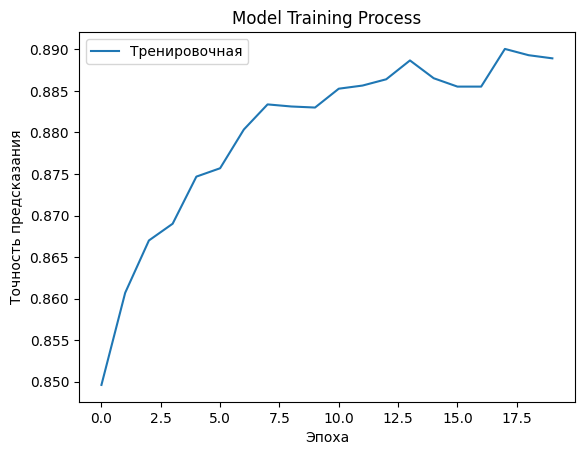

In [ ]:
# Визуализация процесса

plt.plot(history.history['accuracy'])
# plt.plot(history.history['accuracy_test'])
plt.xlabel('Эпоха')
plt.ylabel('Точность предсказания')
plt.title('Model Training Process')
plt.legend(['Тренировочная', 'Тестовая'])
plt.show()

In [ ]:
# Получим наилучшую модель
best_model = clf.export_model()

In [ ]:
# вывод информации о лучшей модели
best_model = clf.export_model()
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15)]              0         
                                                                 
 multi_category_encoding (M  (None, 15)                0         
 ultiCategoryEncoding)                                           
                                                                 
 dense (Dense)               (None, 64)                1024      
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 re_lu_1 (ReLU)              (None, 32)                0         
                                                             

In [ ]:
# Сохраним модель на диск
import joblib
save_path = '/content/drive/MyDrive/Стажировка/Profpatolog/Models/model_NewDset.pkl'
joblib.dump(best_model, save_path)

['/content/drive/MyDrive/Стажировка/Profpatolog/Models/model_NewDset.pkl']

In [ ]:
# Случайно выберем по одному представителю из класса
n_0 = random.choice(index_0)
n_1 = random.choice(index_1)
n_2 = random.choice(index_2)

In [ ]:
print(n_0)
print(y_train_DL[n_0])
# print(df_cut['Заключение'][n_0])
print(df_fl['Заключение'][n_0])

859
[0. 1. 0. 0.]
1.0


In [ ]:
# Предсказание по сформированной выборке Вредности и Диагноза
y_pred = best_model.predict([x_train_DL])

# Перевод полученного вектора в номера классов (0,1,2)
y_class_num = np.argmax(y_pred, axis=-1)

249/249 [==============================] - 2s 6ms/step


In [ ]:
def format_vector(vector):
    return [round(num, 0) for num in vector]

In [ ]:
# Сформируем таблицу с выводом реальных значений и предсказания
df_pred = pd.DataFrame({'Реальное заключение': ['Годен', 'ОграниченноГоден', 'Негоден'],
                        'Реальный вектор': [y_train_DL[n_0], y_train_DL[n_1], y_train_DL[n_2]],
                        'Реальный класс': [y[n_0], y[n_1], y[n_2]],
                        'Предсказанный вектор': [y_pred[n_0], y_pred[n_1], y_pred[n_2]],
                        'Предсказанный класс': [y_class_num[n_0], y_class_num[n_1], y_class_num[n_2]]})

df_pred['Предсказанный вектор'] = df_pred['Предсказанный вектор'].apply(format_vector)

df_pred

,Реальное заключение,Реальный вектор,Реальный класс,Предсказанный вектор,Предсказанный класс
0,Годен,"[0.0, 1.0, 0.0, 0.0]",1.0,"[0.0, 1.0, 0.0, 0.0]",1
1,ОграниченноГоден,"[0.0, 0.0, 1.0, 0.0]",2.0,"[0.0, 0.0, 1.0, 0.0]",2
2,Негоден,"[0.0, 0.0, 0.0, 1.0]",3.0,"[0.0, 1.0, 0.0, 0.0]",1


**Анализ результата:**
Для построения модели сети глубокого обучения был использован StructuredDataClassifier из пакета Autokeras. На исходном, сильно разбалансированном датасете сеть показывала точность на уровне 98%, при этом при загрузке тестовых данных всегда выдавала один результат, "годен". В данном случае говорить о корректной работе сети не приходится.
Попытка улучшить балансировку датасета путем простого удаления половины строк с заключением "годен" ожидаемо ухудшило точность работы сети, при этом сеть "смогла" выделить "ограниченно годного" пациента в тестовой выборке.

## Текстовое представление решения НС по пациенту